# Laboratorio 1 - Análisis Exploratorio de Datos
### Indicadores Macroeconómicos Mundiales

Grupo 7:
- Ariel Espinoza
- Martin García 
- Williams Ajata
- Catalina Yañez

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de gráficos
plt.style.use('default')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Carga y Contextualización del Dataset

In [76]:
df = pd.read_csv("world_bank_data_2025.csv")
df.head()

,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
0,Aruba,aw,2010,2.078141,2.453597e+09,24093.140151,NaN,11.666131,-1.223407,-2.733457,-18.752537,NaN,NaN,NaN,2.313385e+09,NaN
1,Aruba,aw,2011,4.316297,2.637859e+09,25712.384302,NaN,4.801974,4.005674,3.369237,-9.877656,NaN,NaN,NaN,2.391841e+09,NaN
2,Aruba,aw,2012,0.627472,2.615208e+09,25119.665545,NaN,8.200875,0.184033,-1.040800,3.473451,NaN,NaN,NaN,2.499118e+09,NaN
3,Aruba,aw,2013,-2.372065,2.727850e+09,25813.576727,NaN,10.709709,-1.995948,6.431483,-11.813206,NaN,NaN,NaN,2.563517e+09,NaN
4,Aruba,aw,2014,0.421441,2.790850e+09,26129.839062,NaN,3.213869,3.958897,-1.586575,-4.658577,NaN,NaN,NaN,2.688102e+09,NaN


**Contexto del dataset**  
- Contiene indicadores macroeconómicos de diversos países a lo largo de varios años.  
- Fuente: Banco Mundial y otras fuentes internacionales.  
- Motivación:  Nos intereso este dataset ya que es parte de la vida real y permite realizar un análisis de como los países se enfrentan a crisis o crecimiento económico, de esta forma podemos relacionar las variables y concluir las posibles causantes de estas.


## 2. Limpieza y Preparación de Datos

In [77]:
# Valores faltantes
null_info = pd.DataFrame({
    "Valores_Nulos": df.isnull().sum(),
    "Porcentaje_Nulos": (df.isnull().sum() / len(df)) * 100
})
null_info[null_info["Valores_Nulos"] > 0]


,Valores_Nulos,Porcentaje_Nulos
Inflation (CPI %),778,22.407834
GDP (Current USD),539,15.524194
GDP per Capita (Current USD),534,15.380184
Unemployment Rate (%),677,19.498848
"Interest Rate (Real, %)",1737,50.028802
"Inflation (GDP Deflator, %)",568,16.359447
GDP Growth (% Annual),560,16.129032
Current Account Balance (% GDP),909,26.180876
Government Expense (% of GDP),1652,47.580645
Government Revenue (% of GDP),1643,47.321429


## 3. Análisis Exploratorio de Datos


In [88]:
# Identificar columnas numéricas y categóricas
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

print("Variables numéricas:", list(num_cols))
print("Variables categóricas:", list(cat_cols))


Variables numéricas: ['year', 'Inflation (CPI %)', 'GDP (Current USD)', 'GDP per Capita (Current USD)', 'Unemployment Rate (%)', 'Interest Rate (Real, %)', 'Inflation (GDP Deflator, %)', 'GDP Growth (% Annual)', 'Current Account Balance (% GDP)', 'Government Expense (% of GDP)', 'Government Revenue (% of GDP)', 'Tax Revenue (% of GDP)', 'Gross National Income (USD)', 'Public Debt (% of GDP)']
Variables categóricas: ['country_name', 'country_id']


In [94]:
# Detección de valores atípicos
##REVISAR
df[(df["Unemployment Rate (%)"] < 0) | (df["Unemployment Rate (%)"] > 50)]


,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)


In [103]:
# Estadísticos de las numéricas
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
year,3472.0,2.017500e+03,4.610436e+00,2.010000e+03,2.013750e+03,2.017500e+03,2.021250e+03,2.025000e+03
Inflation (CPI %),3472.0,5.787113e+00,1.759274e+01,-6.687321e+00,1.613664e+00,3.213523e+00,5.651328e+00,5.572018e+02
GDP (Current USD),3472.0,3.833148e+11,1.707967e+12,3.210541e+07,6.232950e+09,2.587360e+10,1.791730e+11,2.772071e+13
GDP per Capita (Current USD),3472.0,1.826838e+04,2.704047e+04,1.930071e+02,2.300923e+03,6.827668e+03,2.317973e+04,2.565805e+05
Unemployment Rate (%),3472.0,7.559668e+00,5.573603e+00,1.000000e-01,3.993250e+00,5.771000e+00,9.479750e+00,3.535900e+01
"Interest Rate (Real, %)",3472.0,5.237079e+00,7.403477e+00,-8.113212e+01,3.420331e+00,5.079009e+00,6.655625e+00,6.188260e+01
"Inflation (GDP Deflator, %)",3472.0,6.412383e+00,2.380018e+01,-2.876014e+01,1.425479e+00,3.223184e+00,6.524675e+00,9.215357e+02
GDP Growth (% Annual),3472.0,2.876402e+00,5.607305e+00,-5.433615e+01,1.143684e+00,3.100442e+00,5.179625e+00,8.682675e+01
Current Account Balance (% GDP),3472.0,-2.271075e+00,1.232186e+01,-6.087775e+01,-6.542029e+00,-2.656009e+00,1.392194e+00,2.357506e+02
Government Expense (% of GDP),3472.0,2.654128e+01,1.078591e+01,1.358845e-04,2.065269e+01,2.600085e+01,2.997619e+01,1.037258e+02


In [ ]:
# Resumen de variables categóricas
for c in cat_cols:
    print(f"\n{c}:")
    print(df[c].value_counts().head(5))


country_name:
country_name
Aruba            16
Oman             16
Malaysia         16
Namibia          16
New Caledonia    16
Name: count, dtype: int64

country_id:
country_id
aw    16
om    16
my    16
na    16
nc    16
Name: count, dtype: int64


In [91]:
#Identificación de outliers

def detectar_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5*IQR
    limite_superior = Q3 + 1.5*IQR
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)][col]
    return outliers

for col in num_cols:
    outliers = detectar_outliers(col)
    print(f"{col}: {len(outliers)} outliers detectados")


year: 0 outliers detectados
Inflation (CPI %): 280 outliers detectados
GDP (Current USD): 432 outliers detectados
GDP per Capita (Current USD): 281 outliers detectados
Unemployment Rate (%): 261 outliers detectados
Interest Rate (Real, %): 583 outliers detectados
Inflation (GDP Deflator, %): 380 outliers detectados
GDP Growth (% Annual): 246 outliers detectados
Current Account Balance (% GDP): 356 outliers detectados
Government Expense (% of GDP): 218 outliers detectados
Government Revenue (% of GDP): 188 outliers detectados
Tax Revenue (% of GDP): 273 outliers detectados
Gross National Income (USD): 444 outliers detectados
Public Debt (% of GDP): 1376 outliers detectados


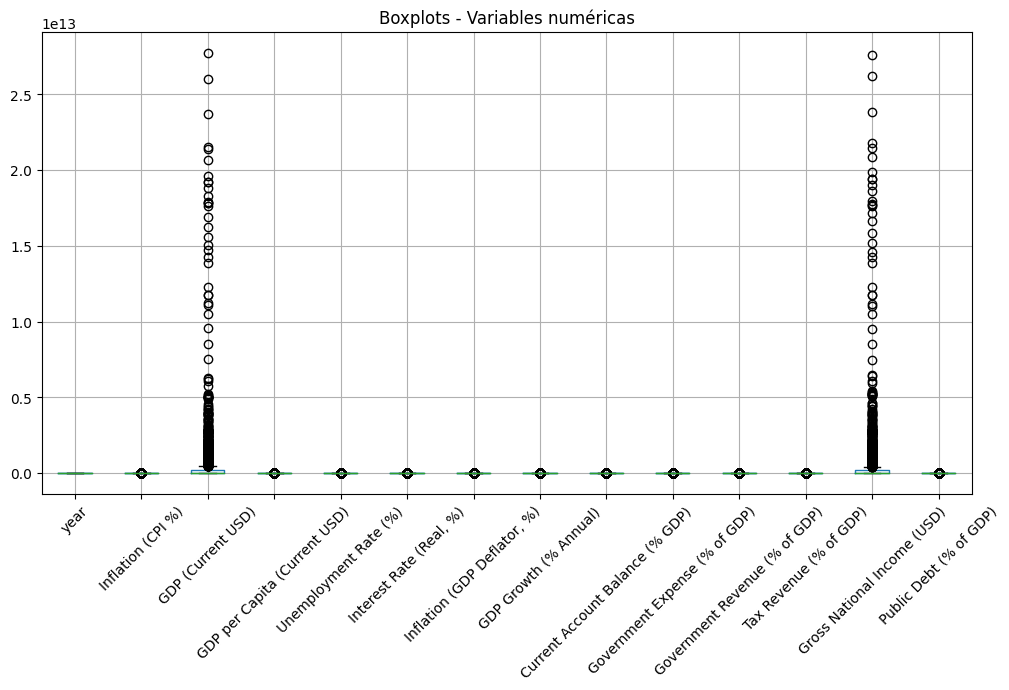

In [ ]:
df[num_cols].boxplot(figsize=(12,6), rot=45)
plt.title("Boxplots - Variables numéricas")
plt.show()


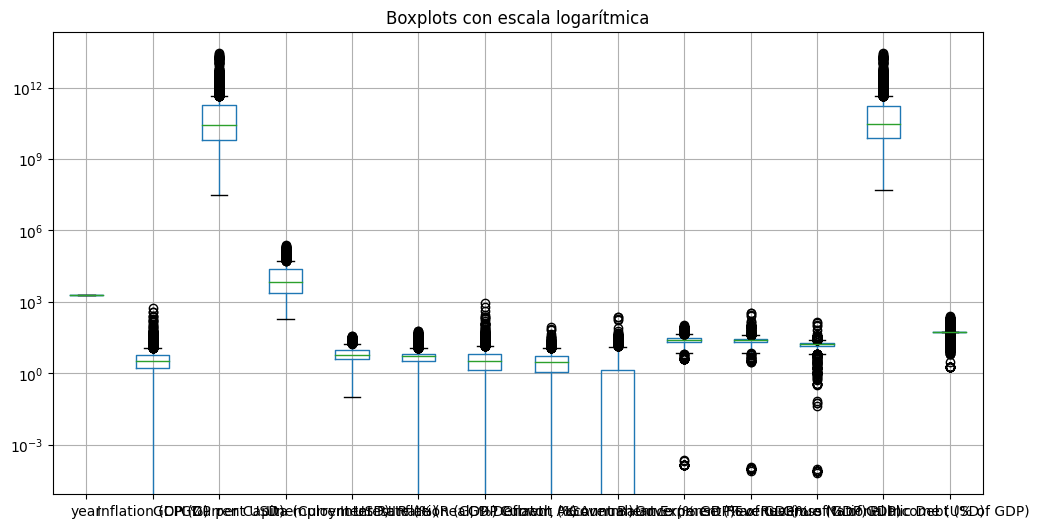

In [ ]:
plt.figure(figsize=(12,6))
df[num_cols].boxplot()
plt.yscale("log")
plt.title("Boxplots con escala logarítmica")
plt.show()

In [83]:
# Top 10 países por PIB promedio
df.groupby("country_name")["GDP (Current USD)"].mean().sort_values(ascending=False).head(10)


country_name
United States         1.984249e+13
China                 1.229537e+13
Japan                 5.096178e+12
Germany               3.883821e+12
United Kingdom        2.856070e+12
France                2.740622e+12
India                 2.469998e+12
Italy                 2.086980e+12
Brazil                2.059907e+12
Russian Federation    1.803511e+12
Name: GDP (Current USD), dtype: float64

In [84]:
# Top 10 países por crecimiento promedio
df.groupby("country_name")["GDP Growth (% Annual)"].mean().sort_values(ascending=False).head(10)


country_name
Guyana          13.018004
Ethiopia         8.711778
Turkmenistan     7.787520
Tajikistan       7.213706
Rwanda           6.970663
China            6.853487
Maldives         6.454400
Bangladesh       6.401608
Uzbekistan       6.364063
Ireland          6.352199
Name: GDP Growth (% Annual), dtype: float64

## 4. Visualizaciones


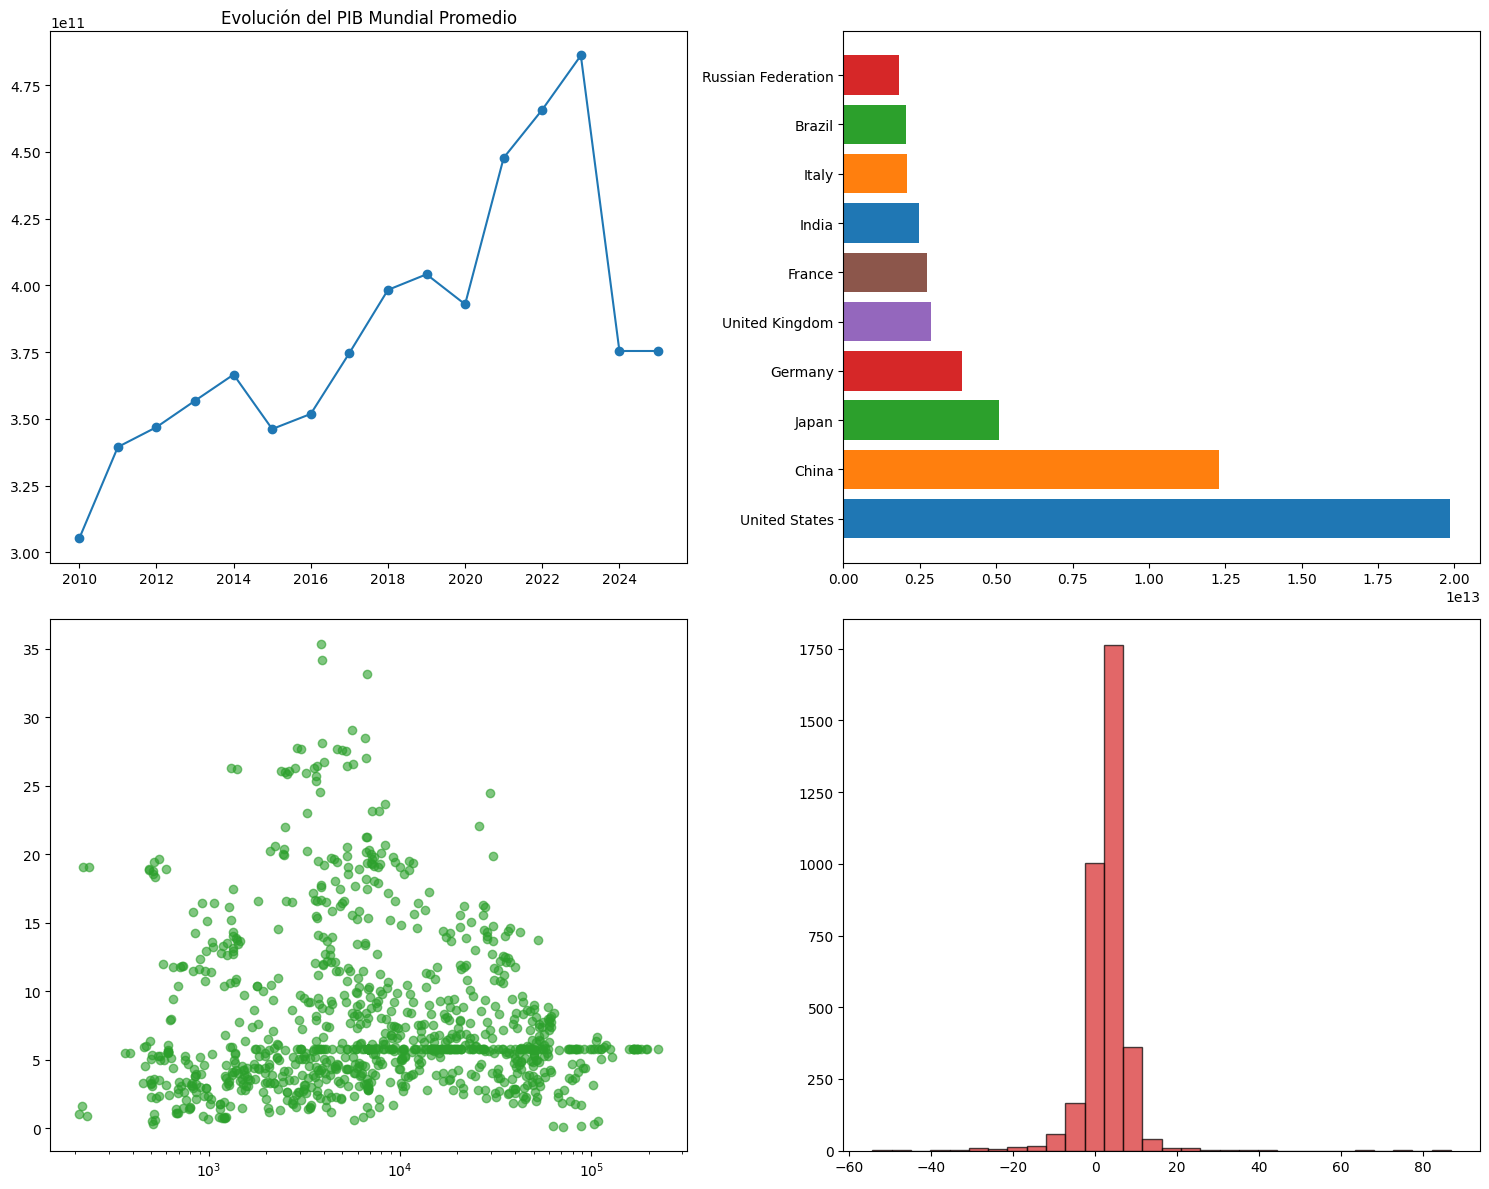

In [85]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b']

# Evolución PIB mundial
yearly_gdp = df.groupby("year")["GDP (Current USD)"].mean()
axes[0,0].plot(yearly_gdp.index, yearly_gdp.values, marker="o", color=colors[0])
axes[0,0].set_title("Evolución del PIB Mundial Promedio")

# Top 10 PIB
top_10 = df.groupby("country_name")["GDP (Current USD)"].mean().nlargest(10)
axes[0,1].barh(top_10.index, top_10.values, color=colors)

# Relación PIB per cápita vs desempleo
sample_df = df.sample(min(1000,len(df)))
axes[1,0].scatter(sample_df["GDP per Capita (Current USD)"],
                  sample_df["Unemployment Rate (%)"], alpha=0.6, color=colors[2])
axes[1,0].set_xscale("log")

# Distribución crecimiento económico
growth_data = df["GDP Growth (% Annual)"].dropna()
axes[1,1].hist(growth_data, bins=30, color=colors[3], edgecolor="black", alpha=0.7)

plt.tight_layout()
plt.show()


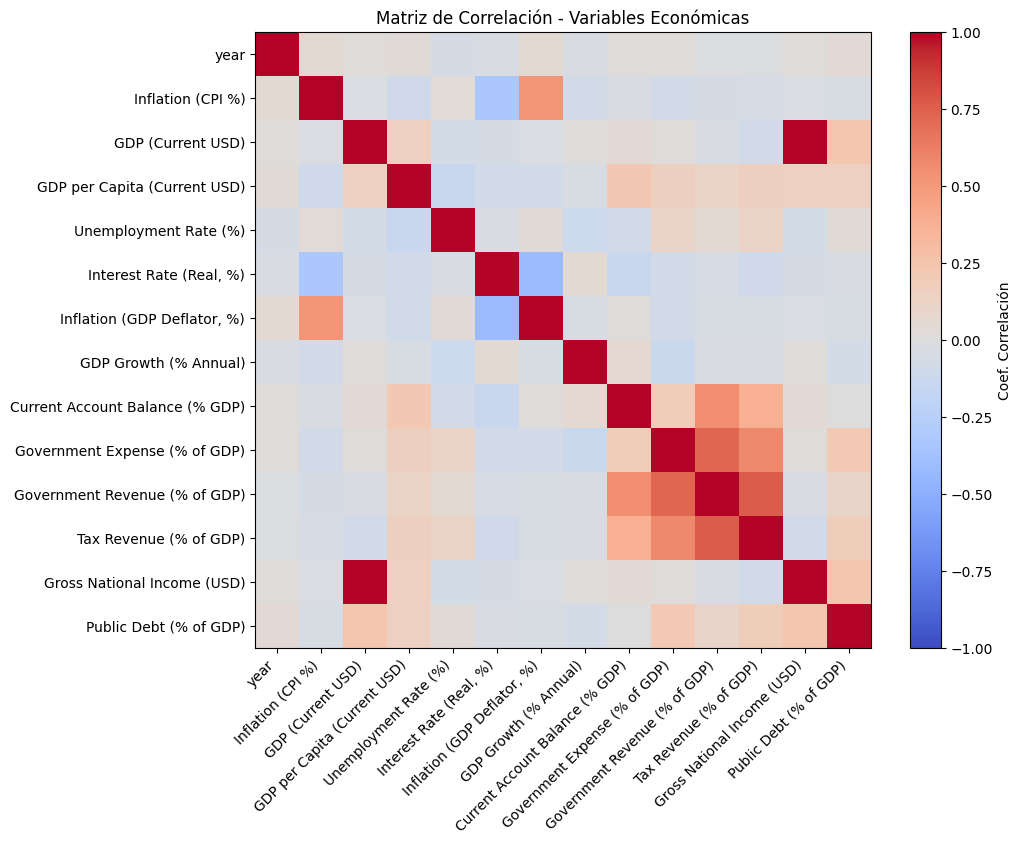

In [86]:
# Matriz de correlación
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(range(len(corr)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr)), corr.columns)
plt.colorbar(im, label="Coef. Correlación")
plt.title("Matriz de Correlación - Variables Económicas")
plt.show()


## 5. Selección de Variables
- **Principales**: `GDP (Current USD)`, `GDP Growth (% Annual)`  
- **Secundarias**: `Inflation (CPI %)`, `Unemployment Rate (%)`  

**Justificación**:  
- PIB y crecimiento son indicadores centrales del desempeño económico.  
- Inflación y desempleo son críticos en política económica.  
- Existen correlaciones interesantes entre ellas. 

## 6. Pregunta de Investigación
**¿Existe una relación significativa entre el crecimiento económico (GDP Growth) y la tasa de desempleo, y cómo varía entre países desarrollados y en desarrollo?**


In [87]:
# Identificar columnas numéricas y categóricas
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

print("Variables numéricas:", list(num_cols))
print("Variables categóricas:", list(cat_cols))


Variables numéricas: ['year', 'Inflation (CPI %)', 'GDP (Current USD)', 'GDP per Capita (Current USD)', 'Unemployment Rate (%)', 'Interest Rate (Real, %)', 'Inflation (GDP Deflator, %)', 'GDP Growth (% Annual)', 'Current Account Balance (% GDP)', 'Government Expense (% of GDP)', 'Government Revenue (% of GDP)', 'Tax Revenue (% of GDP)', 'Gross National Income (USD)', 'Public Debt (% of GDP)']
Variables categóricas: ['country_name', 'country_id']
